<a href="https://colab.research.google.com/github/KrRA1122/Deep-learning/blob/main/Mobile_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Mobile Price Range Multiclass Classification**

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')


Step 1: Read the train dataset

In [3]:
import pandas as pd
df=pd.read_csv('/content/mobile_train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Step 2: Perform Basic Data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

price_range is target

0 - Cheap      
1 - Medium    
2 - Expensive     
3 - Very Expensive    









In [5]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [9]:
df.nunique().count()

21

Step 3: Seperate X and Y (price_range)

In [10]:
X = df.drop(columns=['price_range'])
Y = df[['price_range']]

In [11]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [12]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


In [13]:
Y.value_counts()


price_range
0              500
1              500
2              500
3              500
Name: count, dtype: int64

<Axes: xlabel='price_range'>

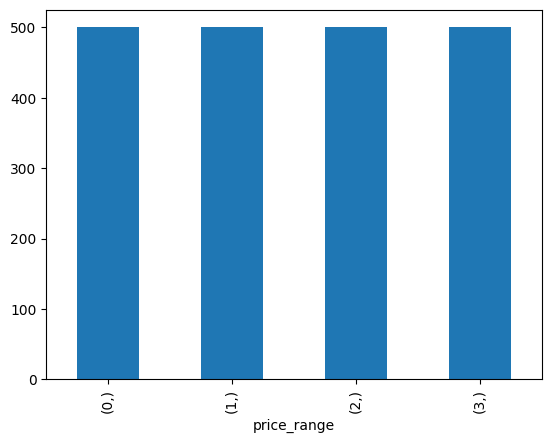

In [14]:
Y.value_counts().plot(kind='bar')

Step 4: Create a preprocessing Pipeline for X , One Hot encode the target feature

In [15]:
X.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [17]:
from sklearn.pipeline import Pipeline #A pipeline in scikit-learn is a sequence of data processing steps
from sklearn.impute import SimpleImputer #is used for imputing missing values in the dataset.
from sklearn.preprocessing import StandardScaler #is used for standardizing features by removing the mean and scaling to unit variance

In [18]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')


In [19]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


Step 5: Apply Train test split

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)



In [21]:
xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
968,1.558089,-0.990050,-1.253064,0.981177,0.619880,-1.043966,0.769162,-0.006069,1.434017,-1.539175,0.013773,0.274736,1.174484,-0.585741,-0.547577,0.742313,-1.466521,0.559641,0.994018,0.986097
240,-1.378345,1.010051,0.830779,-1.019184,-0.992890,0.957886,0.934531,-1.393304,-0.035292,1.521249,-1.470690,-0.261699,-0.561260,1.323964,-0.310171,-1.094526,0.913303,0.559641,0.994018,0.986097
819,-0.005733,-0.990050,-0.762748,0.981177,-0.532099,0.957886,1.375517,-1.393304,1.349249,-1.539175,0.673534,-0.288746,-1.024125,-0.662277,0.402047,1.431127,1.645557,0.559641,-1.006018,0.986097
692,-1.041452,-0.990050,-0.517590,-1.019184,-0.532099,-1.043966,0.328176,-0.352878,1.631808,0.209639,-0.481048,-0.768833,0.977767,1.276014,0.164641,0.512708,-1.100394,-1.786861,-1.006018,0.986097
420,0.495054,1.010051,-1.253064,0.981177,0.619880,-1.043966,-1.380644,-0.352878,-0.995993,0.209639,0.343653,0.400956,-0.341399,-0.495373,-1.497202,-0.176107,1.645557,0.559641,-1.006018,0.986097


In [22]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [23]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


In [24]:
xtrain.shape

(1600, 20)

In [25]:
xtest.shape

(400, 20)

Apply one hot encoding on ytrain and ytest

In [27]:
from keras.utils import to_categorical#The to_categorical function is typically used to convert class vectors (integers) to binary class matrices.

In [28]:
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [29]:
ytrain_cat[0:5]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [30]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [31]:
ytest_cat[0:5]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [32]:
ytest.head()

,price_range
1860,0
353,2
1333,1
905,3
1289,1


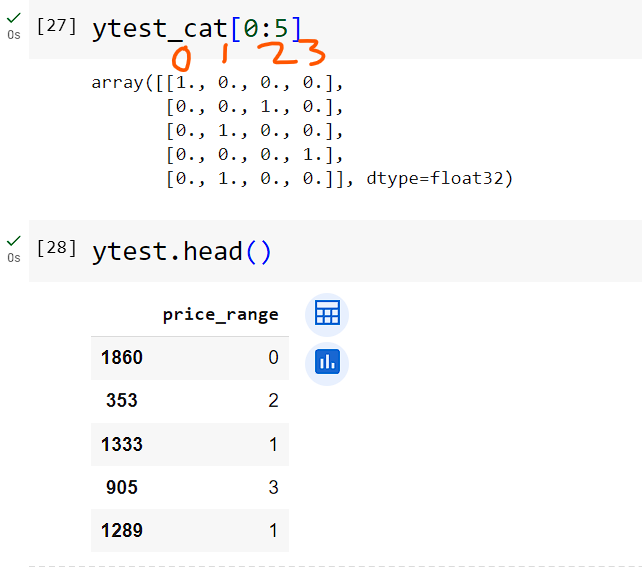

Step 6: Build the neural network

In [34]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [35]:
xtrain.shape

(1600, 20)

In [36]:
ytrain_cat.shape

(1600, 4)

In [37]:
model = Sequential()

In [38]:
# Create input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add Hidden Layer 1
model.add(Dense(units=64, activation='relu'))
# Add Dropout layer 1
model.add(Dropout(rate=0.3))
# Add Hidden Layer 2
model.add(Dense(units=32, activation='relu'))
# Add Dropout Layer 2
model.add(Dropout(rate=0.2))
# Add Output Layer'
model.add(Dense(units=ytrain_cat.shape[1], activation='softmax'))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3556 (13.89 KB)
Trainable params: 3556 (13.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
es = EarlyStopping(monitor='val_loss', patience=15)

In [42]:
hist = model.fit(xtrain, ytrain_cat, validation_split=0.2, epochs=200, callbacks=[es])


Epoch 1/200
40/40 [==============================] - 2s 16ms/step - loss: 1.4529 - accuracy: 0.2930 - val_loss: 1.2859 - val_accuracy: 0.4219
Epoch 2/200
40/40 [==============================] - 0s 6ms/step - loss: 1.2641 - accuracy: 0.3914 - val_loss: 1.1473 - val_accuracy: 0.5188
Epoch 3/200
40/40 [==============================] - 0s 5ms/step - loss: 1.1219 - accuracy: 0.4859 - val_loss: 0.9984 - val_accuracy: 0.5906
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.9904 - accuracy: 0.5594 - val_loss: 0.8594 - val_accuracy: 0.6594
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.8599 - accuracy: 0.6414 - val_loss: 0.7444 - val_accuracy: 0.7125
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.7716 - accuracy: 0.6586 - val_loss: 0.6613 - val_accuracy: 0.7437
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.6912 - accuracy: 0.6984 - val_loss: 0.5920 - val_accuracy: 0.7656
Epoch 8/200


Plot the learning curve

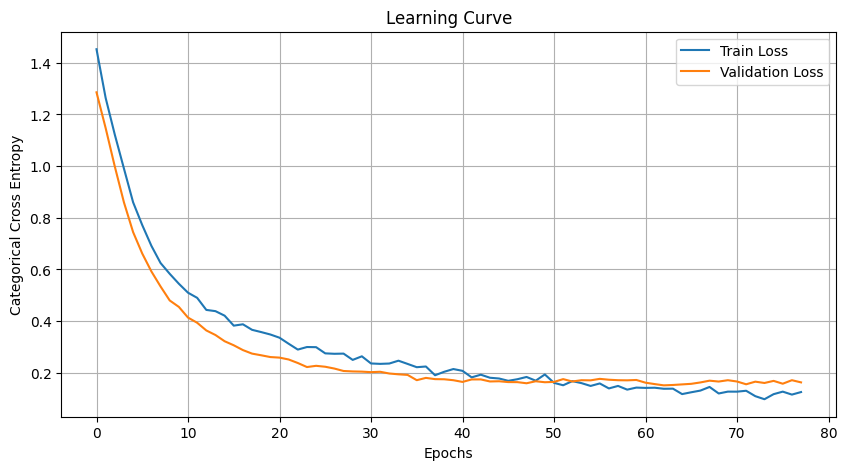

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label ='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy')
plt.title('Learning Curve')
plt.grid()
plt.legend()
plt.show()

Step 7: Evaluate model

In [44]:
model.evaluate(xtrain, ytrain_cat)

50/50 [==============================] - 0s 1ms/step - loss: 0.0550 - accuracy: 0.9862


[0.05497055873274803, 0.9862499833106995]

In [45]:
model.evaluate(xtest, ytest_cat)

13/13 [==============================] - 0s 3ms/step - loss: 0.1383 - accuracy: 0.9375


[0.1382959634065628, 0.9375]

Predict the probability for train and test

In [46]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

13/13 [==============================] - 0s 3ms/step


In [47]:
yprob_train[0:5]

array([[5.0868630e-06, 8.5074657e-01, 1.4924847e-01, 3.1872884e-09],
       [2.3056083e-23, 2.7362287e-08, 9.8278022e-01, 1.7219732e-02],
       [9.4244218e-01, 5.7557803e-02, 1.2312991e-09, 8.7424430e-30],
       [8.8370029e-24, 1.4740534e-09, 9.4928861e-02, 9.0507108e-01],
       [2.1526041e-04, 9.9773246e-01, 2.0522524e-03, 3.9196382e-14]],
      dtype=float32)

In [48]:
yprob_test[0:5]

array([[9.83257174e-01, 1.67427640e-02, 1.69885883e-10, 8.58589523e-34],
       [5.12183247e-11, 6.61624363e-03, 9.93382156e-01, 1.56211343e-06],
       [1.16732679e-02, 9.88214791e-01, 1.12059090e-04, 1.01379165e-19],
       [1.53393123e-32, 7.64546643e-14, 3.66170076e-03, 9.96338367e-01],
       [1.58595736e-04, 9.77919936e-01, 2.19215341e-02, 3.38672076e-11]],
      dtype=float32)

In [49]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [50]:
ypred_train[0:5]

array([1, 2, 0, 3, 1])

In [51]:
ytrain.head()

,price_range
968,1
240,2
819,0
692,3
420,1


In [54]:
ypred_test[0:5],  ytest.head()

(array([0, 2, 1, 3, 1]),
       price_range
 1860            0
 353             2
 1333            1
 905             3
 1289            1)

Plot confusion matrix for test data

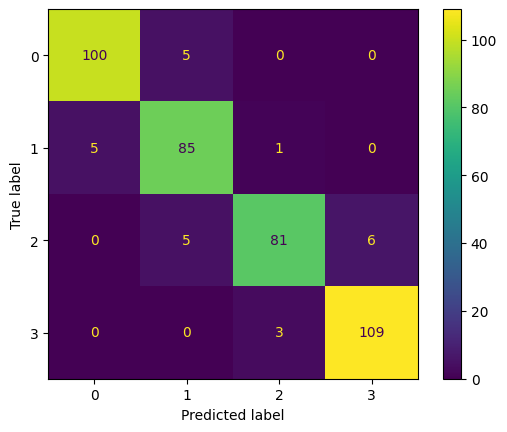

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

Print classifcation report

In [57]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       105
           1       0.89      0.93      0.91        91
           2       0.95      0.88      0.92        92
           3       0.95      0.97      0.96       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



From above data i have f1 score macro average 0.94 > 0.8 hence above model is good and can be used for any predictions

====================================      
Save the model for future use

In [58]:
model.save('MobileModel.keras')

##Out of sample prediction

In [59]:
xnew = pd.read_csv('/content/mobile_test.csv')
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [60]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [61]:
#id  additional in test data
xnew2 = xnew.drop(columns=['id'])

In [62]:
xnew2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [64]:
#preprocess test data
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


In [65]:
probs = model.predict(xnew_pre)
probs[0:5]

32/32 [==============================] - 0s 8ms/step


array([[1.3527021e-22, 4.9584790e-09, 2.3328885e-01, 7.6671112e-01],
       [5.0341702e-31, 1.0422596e-12, 8.6785369e-03, 9.9132144e-01],
       [1.4120069e-17, 2.6883588e-06, 6.9685954e-01, 3.0313775e-01],
       [0.0000000e+00, 6.5422786e-18, 5.6953460e-04, 9.9943054e-01],
       [3.4820053e-04, 9.9898696e-01, 6.6474848e-04, 5.1488372e-14]],
      dtype=float32)

In [66]:
preds = np.argmax(probs, axis=1)
max_probs = np.max(probs, axis=1)

In [67]:
max_probs[0:5]

array([0.7667111 , 0.99132144, 0.69685954, 0.99943054, 0.99898696],
      dtype=float32)

Save above results in dataframe and csv format

In [68]:
df_final = xnew[['id']]
df_final

,id
0,1
1,2
2,3
3,4
4,5
...,...
995,996
996,997
997,998
998,999


In [69]:
df_final['price_range'] = preds
df_final['probability'] = max_probs

In [70]:
df_final

,id,price_range,probability
0,1,3,0.766711
1,2,3,0.991321
2,3,2,0.696860
3,4,3,0.999431
4,5,1,0.998987
...,...,...,...
995,996,2,0.929876
996,997,1,0.998158
997,998,1,0.544921
998,999,2,0.935572


In [74]:
df_final['price_range'].value_counts()

price_range
3    264
2    255
0    249
1    232
Name: count, dtype: int64

<Axes: xlabel='price_range'>

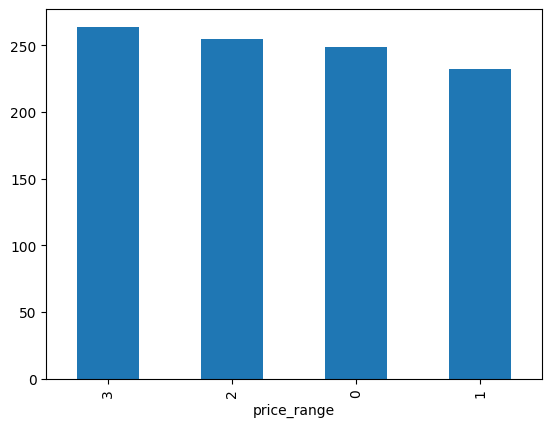

In [75]:
df_final['price_range'].value_counts().plot(kind='bar')

Export Data

In [81]:
df_final.to_csv('MobileResults.csv', index=False)